In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys

In [3]:
sys.path.append('/Users/lukelee/Documents/Interview/Learning/')

In [4]:
import yahoo.code.support_functions as sf

In [5]:
import yfinance as yf


In [6]:
spx = yf.Ticker("^SPX")

In [7]:
hist = spx.history(period="1mo")

In [8]:
hist.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-23 00:00:00-04:00,5781.890137,5829.509766,5767.410156,5802.819824,4662820000,0.0,0.0
2025-05-27 00:00:00-04:00,5854.069824,5924.330078,5854.069824,5921.540039,5366380000,0.0,0.0
2025-05-28 00:00:00-04:00,5925.540039,5939.919922,5881.879883,5888.549805,4665050000,0.0,0.0
2025-05-29 00:00:00-04:00,5939.959961,5943.129883,5873.799805,5912.169922,4569750000,0.0,0.0
2025-05-30 00:00:00-04:00,5903.669922,5922.140137,5843.660156,5911.689941,6378540000,0.0,0.0


In [9]:
last_obs_date = hist.index.max()
last_obs_date

Timestamp('2025-05-30 00:00:00-0400', tz='America/New_York')

In [10]:
last_close = hist.loc[last_obs_date,'Close']
last_close

np.float64(5911.68994140625)

In [11]:
spx_calls = sf.get_1m_option_chain(spx,last_obs_date,last_close,IS_CALL=True)
spx_puts = sf.get_1m_option_chain(spx,last_obs_date,last_close,IS_CALL=False)

S&P 500 INDEX
Call Option 1 month expiration selected: 2025-06-02, dtox of 31
S&P 500 INDEX
Put Option 1 month expiration selected: 2025-06-02, dtox of 31


In [12]:
#[x for x in dir(spx_calls) if not(x.startswith('_'))]

In [13]:
spx_calls.head(2).T

,0,1
contractSymbol,SPXW250602C04000000,SPXW250602C04400000
lastTradeDate,2025-05-29 18:33:42+00:00,2025-05-28 17:44:33+00:00
strike,4000.0,4400.0
lastPrice,1899.58,1508.78
bid,1889.1,1488.7
ask,1917.1,1516.7
change,0.0,0.0
percentChange,0.0,0.0
volume,1.0,1.0
openInterest,1,8


## Visualize Implied volatility Skew/Smile

Plot 2 sets of figures, ones for call and one for put. Each figure will has 4 suboplots of options data based on the combination of the following variables
- x-axis: Log-moneyness, Strike
- y-axis: Implied Volatility, Price

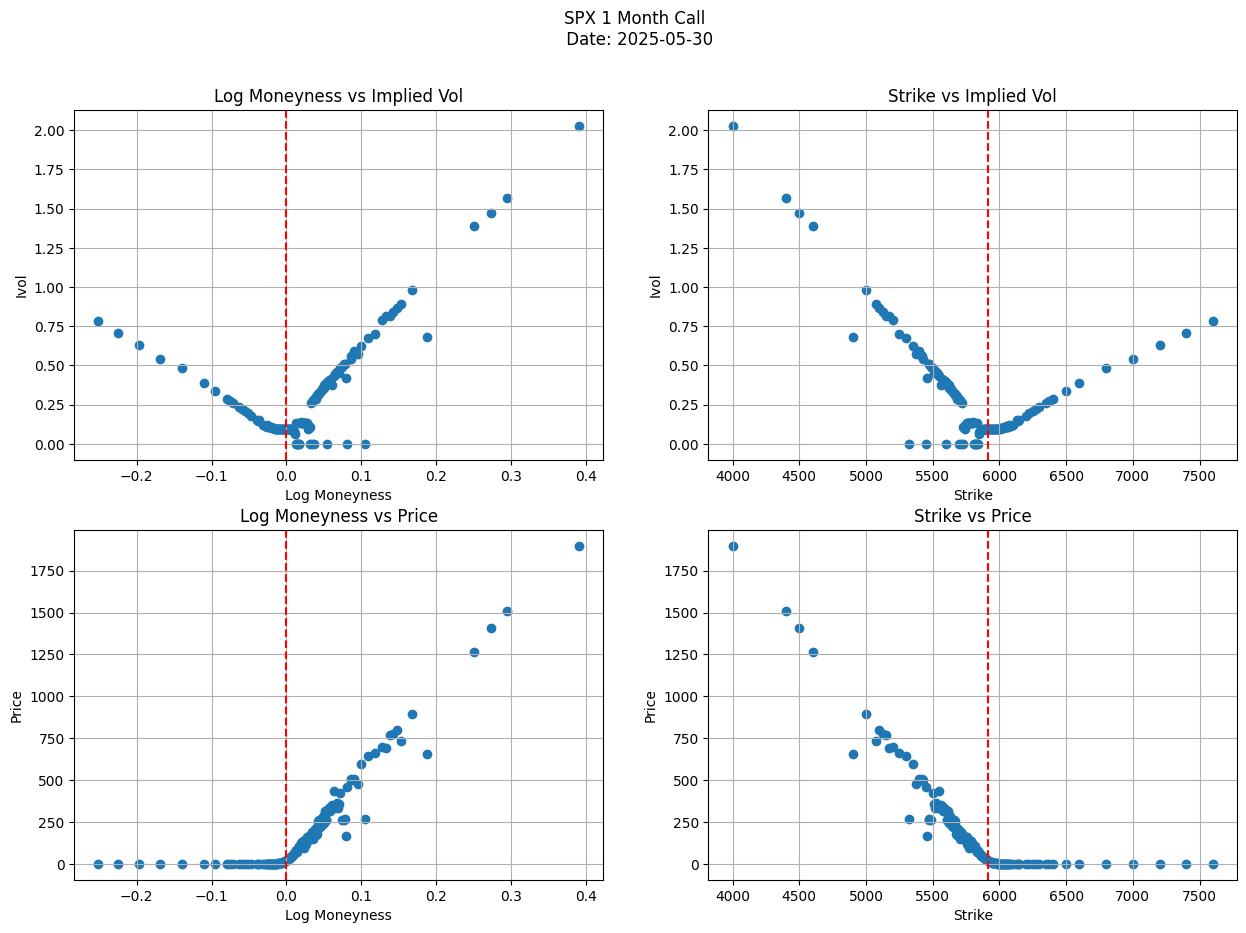

In [14]:
fig_c,ax_c = sf.plot_ivol_and_price(spx_calls,last_close)
plt.suptitle(f"SPX 1 Month Call \n Date: {last_obs_date.to_pydatetime().date().strftime("%Y-%m-%d")}")
plt.show()

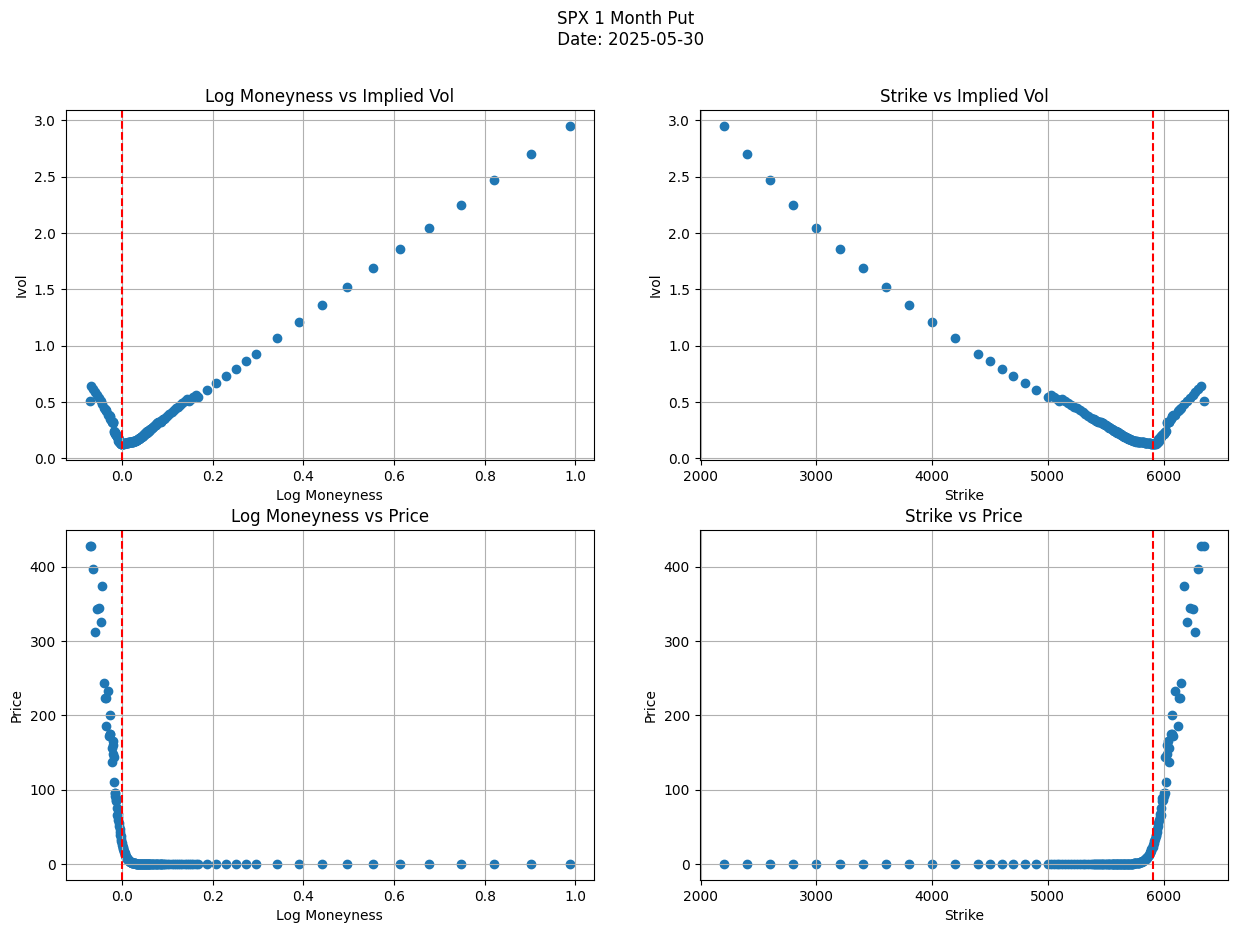

In [15]:
fig_p,ax_p = sf.plot_ivol_and_price(spx_puts,last_close)
plt.suptitle(f"SPX 1 Month Put \n Date: {last_obs_date.to_pydatetime().date().strftime("%Y-%m-%d")}")
plt.show()